In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('dataset.csv', low_memory = False)

In [3]:
dataset.sample(100)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
94909,333,6/7/2010,Gujarat,Vadodara,Gujarat State Pollution Control Board,"Residential, Rural and other Areas",14.0,25.0,104.0,NaN,"Dandia Bazaar, Vadodara",NaN,7/6/2010
186368,NaN,20/4/2009,Madhya Pradesh,Bhopal,NaN,Industrial Areas,7.4,21.1,116.0,535.0,Govindpura,NaN,4/20/2009
15532,466,26/01/2012,Andhra Pradesh,Kurnool,Andhra Pradesh State Pollution Control Board,"Residential, Rural and other Areas",4.0,9.0,93.0,NaN,"Mourya Inn, Kurnool",NaN,1/26/2012
163906,29,15/03/2011,Kerala,Kochi,Kerala State Pollution Control Board,Industrial Area,2.0,5.0,27.0,54.0,"Eloor, Kochi",NaN,3/15/2011
431140,162,22-02-13,West Bengal,Kolkata,National Environmental Engineering Research In...,Industrial Area,31.0,147.0,228.0,NaN,"Cossipore Police Station, B.T. Road, Kolkata",NaN,2/22/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425281,473,3/11/2010,West Bengal,Kolkata,West Bengal State Pollution Control Board,"Residential, Rural and other Areas",13.9,101.5,197.0,376.0,"Moulali, Kolkata",NaN,11/3/2010
169710,30,5/6/2013,Kerala,Kochi,Kerala State Pollution Control Board,Industrial Area,2.0,4.5,92.0,NaN,"Irumpanam, Kochi",NaN,6/5/2013
60810,67,9/2/2010,Chhattisgarh,Bhilai,Chattisgarh Environment Conservation Board,"Residential, Rural and other Areas",3.0,12.0,73.0,NaN,"R.O., 5/32 Banglow Office Building, Bhilai",NaN,2/9/2010
147610,328,5/6/2013,Karnataka,Mysore,Karnataka State Pollution Control Board,Industrial Area,10.0,22.0,61.0,NaN,"KSPCB Bldg. Hebbal Ind. Area, Mysore",NaN,6/5/2013


In [4]:
dataset.dtypes

stn_code                        object
sampling_date                   object
state                           object
location                        object
agency                          object
type                            object
so2                            float64
no2                            float64
rspm                           float64
spm                            float64
location_monitoring_station     object
pm2_5                          float64
date                            object
dtype: object

In [5]:
dataset.shape

(435742, 13)

In [6]:
dataset.isnull().sum()/len(dataset)

stn_code                       0.330647
sampling_date                  0.000007
state                          0.000000
location                       0.000007
agency                         0.343049
type                           0.012377
so2                            0.079510
no2                            0.037254
rspm                           0.092307
spm                            0.544788
location_monitoring_station    0.063090
pm2_5                          0.978625
date                           0.000016
dtype: float64

In [7]:
def convert_date(x):
    try:
        return datetime.strptime(x, '%m/%d/%Y')
    except:
        return 'Exception Raised'

dataset['date_processed'] = dataset['date'].apply(convert_date)

In [8]:
dataset.loc[dataset['date_processed'] == 'Exception Raised']
# The dates here are either weird or missing. E.g. 31st September and 31st June. 

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,date_processed
148537,598,31/9/2014,Karnataka,Bangalore,Karnataka State Pollution Control Board,Sensitive Area,6.0,8.0,25.0,NaN,"Department of Environmental Science, Jnanabhar...",NaN,NaN,Exception Raised
245191,281,31/6/2014,Maharashtra,Chandrapur,Maharashtra State Pollution Control Board,Industrial Area,11.0,25.0,80.0,NaN,M.I.D.C. Chandrapur.,NaN,NaN,Exception Raised
245355,639,31/6/2014,Maharashtra,Chandrapur,Maharashtra State Pollution Control Board,"Residential, Rural and other Areas",12.0,41.0,104.0,NaN,"Muncipal Council, Ballarshah, Chandrapur",NaN,NaN,Exception Raised
284318,690,31/11/2014,Odisha,Balasore,Odisha State Pollution Control Board,Industrial Area,9.0,14.0,105.0,NaN,"Rasulpur, Near Balgopalpur Industrial Area",NaN,NaN,Exception Raised
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exception Raised
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exception Raised
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Exception Raised


In [9]:
cleaned_data = dataset.loc[dataset['date_processed'] != 'Exception Raised']
cleaned_data['Year'] = cleaned_data['date_processed'].dt.year
cleaned_data['date_processed'] = cleaned_data['date_processed'].dt.date

/Users/tanushagoswami/anaconda3/envs/basemap_env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/tanushagoswami/anaconda3/envs/basemap_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
cleaned_data.head(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,date_processed,Year
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,2/1/1990,1990-02-01,1990
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,2/1/1990,1990-02-01,1990
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,2/1/1990,1990-02-01,1990
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,3/1/1990,1990-03-01,1990
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,3/1/1990,1990-03-01,1990
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,3/1/1990,1990-03-01,1990
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,4/1/1990,1990-04-01,1990
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,4/1/1990,1990-04-01,1990
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,4/1/1990,1990-04-01,1990
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,5/1/1990,1990-05-01,1990


In [11]:
def clean_type(t):
    if (t == 'Residential, Rural and other Areas') | (t == 'Residential and others') | (t == 'RIRUO') | (t == 'Residential'):
        return 'Residential'
    elif (t == 'Industrial Area') | (t == 'Industrial Areas') | (t == 'Industrial'):
        return 'Industrial'
    else:
        return 'Sensitive'

cleaned_data['type']  = cleaned_data['type'].apply(clean_type)
cleaned_data['type'].value_counts()

/Users/tanushagoswami/anaconda3/envs/basemap_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Residential    267266
Industrial     148069
Sensitive       20400
Name: type, dtype: int64

In [12]:
cleaned_data.groupby(['Year','type'])['so2','no2','rspm','spm','pm2_5'].mean().reset_index()

,Year,type,so2,no2,rspm,spm,pm2_5
0,1987,Industrial,27.130601,37.864767,NaN,302.955752,NaN
1,1987,Residential,15.227778,19.492857,NaN,274.717105,NaN
2,1987,Sensitive,10.617391,24.072000,NaN,160.542857,NaN
3,1988,Industrial,28.265950,35.414286,NaN,249.830247,NaN
4,1988,Residential,15.172477,24.316514,NaN,260.096234,NaN
...,...,...,...,...,...,...,...
82,2014,Residential,8.586549,23.106274,97.572896,NaN,36.289003
83,2014,Sensitive,5.309674,18.190852,102.448294,NaN,NaN
84,2015,Industrial,9.979576,26.285250,109.124977,NaN,46.939688
85,2015,Residential,7.902586,22.630938,97.025717,NaN,40.471550


In [13]:
grouped_data = cleaned_data.groupby(['Year','date_processed'])['so2','no2','rspm','spm','pm2_5'].mean().reset_index()

/Users/tanushagoswami/anaconda3/envs/basemap_env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


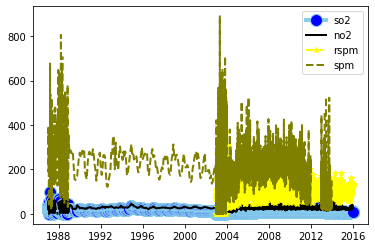

In [14]:
plt.plot('date_processed','so2', data=grouped_data, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('date_processed', 'no2', data=grouped_data, marker='', color='black', linewidth=2)
plt.plot('date_processed', 'rspm', data=grouped_data, marker='*', color='yellow', linewidth=2, linestyle='dashed')
plt.plot('date_processed', 'spm', data=grouped_data, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()


In [15]:
cleaned_data.describe()

,so2,no2,rspm,spm,pm2_5,Year
count,401092.000000,419505.000000,395516.000000,198355.000000,9314.000000,435735.000000
mean,10.829428,25.809659,108.833091,220.783480,40.791467,2009.534123
std,11.177239,18.503130,74.872675,151.395457,30.832525,4.791559
min,0.000000,0.000000,0.000000,0.000000,3.000000,1987.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000,2007.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000,2010.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000,2013.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000,2015.000000


In [16]:
grouped_data = grouped_data.sort_values(by = 'date_processed')
grouped_data['Year'].value_counts()

2004    366
2008    366
2012    366
2015    365
2011    365
2007    365
2014    365
2010    365
2006    365
2009    365
2013    365
2005    364
2003    318
1988    103
1987     98
1998     12
2002     12
2001     12
1997     12
1993     12
1991     12
1995     12
1999     12
2000     12
1996     12
1992     12
1990     12
1994     11
1989     11
Name: Year, dtype: int64

In [17]:
cleaned_data['Year'].value_counts()

2015    50319
2013    45803
2014    44215
2011    37641
2012    35101
2010    34975
2007    34376
2008    32751
2006    28862
2009    28749
2005    19336
2004    16119
2003     2556
2002     2157
2001     2080
1996     2013
1997     1973
2000     1932
1999     1872
1995     1869
1998     1839
1991     1616
1994     1557
1990     1485
1993     1420
1992     1227
1989      823
1988      641
1987      428
Name: Year, dtype: int64

In [18]:
cleaned_data.loc[cleaned_data['Year'] == 1987]

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,date_processed,Year
45819,46,30-03-87,Bihar,Sindri,Bihar Pollution Control Board,Industrial,66.7,30.4,NaN,451.0,NaN,NaN,3/30/1987,1987-03-30,1987
45820,45,24-03-87,Bihar,Jharia,Bihar Pollution Control Board,Industrial,47.2,32.8,NaN,514.0,NaN,NaN,3/24/1987,1987-03-24,1987
45821,44,3/9/1987,Bihar,Dhanbad,Bihar Pollution Control Board,Residential,NaN,30.5,NaN,172.0,NaN,NaN,9/3/1987,1987-09-03,1987
45822,45,13-04-87,Bihar,Jharia,Bihar Pollution Control Board,Industrial,41.7,48.6,NaN,621.0,NaN,NaN,4/13/1987,1987-04-13,1987
45823,44,4/10/1987,Bihar,Dhanbad,Bihar Pollution Control Board,Residential,23.6,21.0,NaN,227.0,NaN,NaN,10/4/1987,1987-10-04,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413351,11,11/3/1987,West Bengal,Howrah,West Bengal Pollution Control Board,Industrial,35.0,69.6,NaN,196.0,NaN,NaN,3/11/1987,1987-03-11,1987
413352,8,12/1/1987,West Bengal,Howrah,West Bengal Pollution Control Board,Industrial,130.2,143.8,NaN,1402.0,NaN,NaN,1/12/1987,1987-01-12,1987
413353,9,12/2/1987,West Bengal,Howrah,West Bengal Pollution Control Board,Industrial,140.6,120.1,NaN,746.0,NaN,NaN,2/12/1987,1987-02-12,1987
413354,10,12/2/1987,West Bengal,Howrah,West Bengal Pollution Control Board,Industrial,139.0,93.3,NaN,545.0,NaN,NaN,2/12/1987,1987-02-12,1987


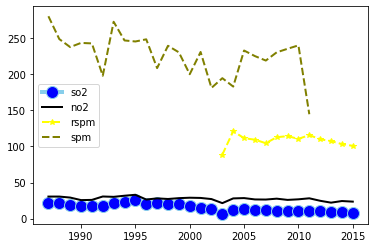

In [19]:
yearly_grouped = cleaned_data.groupby(['Year'])['so2','no2','rspm','spm','pm2_5'].mean().reset_index()
plt.plot('Year','so2', data=yearly_grouped, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot('Year', 'no2', data=yearly_grouped, marker='', color='black', linewidth=2)
plt.plot('Year', 'rspm', data=yearly_grouped, marker='*', color='yellow', linewidth=2, linestyle='dashed')
plt.plot('Year', 'spm', data=yearly_grouped, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.legend()


In [20]:
non_attainment_cities = pd.read_csv('Non Attainment Cities.csv')

In [21]:
non_attainment_data = cleaned_data.loc[cleaned_data['location'].isin(list(non_attainment_cities['Cities'].unique()))]

In [22]:
pd.DataFrame(non_attainment_data['location'].value_counts())

,location
Guwahati,9984
Delhi,8551
Chandigarh,8520
Jaipur,7850
Nagpur,7829
...,...
Tuticorin,247
Sibsagar,240
Kashipur,236
Rishikesh,215


In [23]:
(non_attainment_data.loc[non_attainment_data['location'] == 'Kanpur'])#['Year'].value_counts()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,date_processed,Year
368446,85,February - M021990,Uttar Pradesh,Kanpur,Uttar Pradesh Pollution Control Board,Residential,NaN,NaN,NaN,378.0,NaN,NaN,2/1/1990,1990-02-01,1990
368451,141,February - M021990,Uttar Pradesh,Kanpur,NaN,Residential,4.2,7.1,NaN,160.0,NaN,NaN,2/1/1990,1990-02-01,1990
368452,142,February - M021990,Uttar Pradesh,Kanpur,NaN,Residential,9.0,11.8,NaN,469.0,NaN,NaN,2/1/1990,1990-02-01,1990
368453,143,February - M021990,Uttar Pradesh,Kanpur,NaN,Industrial,6.3,10.6,NaN,320.0,NaN,NaN,2/1/1990,1990-02-01,1990
368462,141,March - M031990,Uttar Pradesh,Kanpur,NaN,Residential,3.7,6.8,NaN,325.0,NaN,NaN,3/1/1990,1990-03-01,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410599,723,22-12-15,Uttar Pradesh,Kanpur,Uttar Pradesh State Pollution Control Board,Residential,8.0,32.0,448.0,NaN,"Ramadevi, Kanpur",NaN,12/22/2015,2015-12-22,2015
410600,723,28-12-15,Uttar Pradesh,Kanpur,Uttar Pradesh State Pollution Control Board,Residential,7.0,42.0,521.0,NaN,"Ramadevi, Kanpur",NaN,12/28/2015,2015-12-28,2015
410601,723,29-12-15,Uttar Pradesh,Kanpur,Uttar Pradesh State Pollution Control Board,Residential,9.0,41.0,401.0,NaN,"Ramadevi, Kanpur",NaN,12/29/2015,2015-12-29,2015
410602,723,30-12-15,Uttar Pradesh,Kanpur,Uttar Pradesh State Pollution Control Board,Residential,9.0,45.0,464.0,NaN,"Ramadevi, Kanpur",NaN,12/30/2015,2015-12-30,2015


In [24]:
non_attainment_data['total_pollution']  = non_attainment_data.so2.fillna(0) + non_attainment_data.pm2_5.fillna(0) + non_attainment_data.no2.fillna(0) + non_attainment_data.rspm.fillna(0) + non_attainment_data.spm.fillna(0)

/Users/tanushagoswami/anaconda3/envs/basemap_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
total_stations = non_attainment_data.groupby(['location'])['location_monitoring_station'].nunique().reset_index()
total_stations.sort_values(by = 'location_monitoring_station', ascending = False)

,location,location_monitoring_station
20,Delhi,22
47,Kolkata,21
41,Kanpur,16
13,Bangalore,15
1,Ahmedabad,15
...,...,...
58,Nalbari,1
55,Nagaon,1
42,Kashipur,1
80,Tuticorin,0


In [26]:
# So for a particular month and location, you can have a type and a location monitoring station
# On a particular day, in a particular location and type of location, there can be multiple monitoring stations 
# Instead of summing the pollution, we take a mean across all stations to find the average air quality for that day.

# average_non_attainment = non_attainment_data.groupby(['location','date_processed','type'])['no2','total_pollution'].mean().reset_index()

# Gotta plot that on maps

total_pollution = non_attainment_data.groupby(['location','date_processed','Year','type'])['no2','so2','rspm','spm','pm2_5','total_pollution'].mean().reset_index()
v = pd.DataFrame(total_pollution['location'].value_counts())
total_pollution = pd.merge(total_pollution, v, how = 'inner', left_on = 'location', right_index = True)
del total_pollution['location_x']
total_pollution.columns = ['location','date_processed','Year','type','no2','so2','rspm','spm','pm2_5','total_pollution','# Data Points']
total_pollution = total_pollution.groupby(['location','# Data Points','Year','type'])['no2','so2','rspm','spm','pm2_5','total_pollution'].sum().reset_index()
total_pollution = pd.merge(total_pollution, total_stations, how = 'inner', on = 'location')
total_pollution['location'].nunique()
# Worst N cities of total_pollution
worst30 = total_pollution.groupby(['location'])['total_pollution'].sum().reset_index().sort_values(by='total_pollution', ascending = False).head(30)
# Getting their actual data (Yearly, by type etc)
worst30 = total_pollution.loc[total_pollution['location'].isin(worst30['location'].unique().tolist())]
worst30#['location'].nunique()


,location,# Data Points,Year,type,no2,so2,rspm,spm,pm2_5,total_pollution,location_monitoring_station
0,Agra,5083,1987,Industrial,40.60,91.3,0.0,3537.0,0.0,3668.90,12
1,Agra,5083,1987,Residential,82.10,190.7,0.0,7918.0,0.0,8190.80,12
2,Agra,5083,1987,Sensitive,228.90,140.0,0.0,3386.0,0.0,3754.90,12
3,Agra,5083,1988,Industrial,82.35,145.4,0.0,5323.5,0.0,5544.90,12
4,Agra,5083,1988,Residential,139.75,243.5,0.0,6675.0,0.0,7058.25,12
...,...,...,...,...,...,...,...,...,...,...,...
2025,Udaipur,3645,2013,Residential,5724.00,1092.0,23066.5,0.0,0.0,29882.50,7
2026,Udaipur,3645,2014,Industrial,3601.00,608.0,14669.0,0.0,0.0,18878.00,7
2027,Udaipur,3645,2014,Residential,5903.00,1089.5,18782.5,0.0,0.0,25775.00,7
2028,Udaipur,3645,2015,Industrial,3724.00,644.0,23086.0,0.0,0.0,27454.00,7


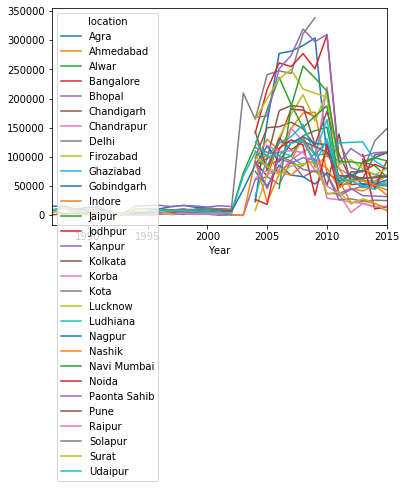

In [27]:
worst30.groupby(['Year','location'])['total_pollution'].sum().unstack().plot()

In [28]:
# Sum of ALL POLLUTION
measure = 'total_pollution'
avg_worst30 = worst30.groupby('location')[measure].sum().reset_index()
avg_worst30.sort_values(by = measure, ascending = False)

,location,total_pollution
14,Kanpur,2.480431e+06
7,Delhi,2.449089e+06
13,Jodhpur,2.095988e+06
0,Agra,1.998048e+06
18,Lucknow,1.934255e+06
12,Jaipur,1.703222e+06
19,Ludhiana,1.534782e+06
15,Kolkata,1.476508e+06
22,Navi Mumbai,1.400905e+06
5,Chandigarh,1.296354e+06


In [29]:
avg_worst30.to_csv('Worst 30 Total Polluted Cities.csv', index = False)

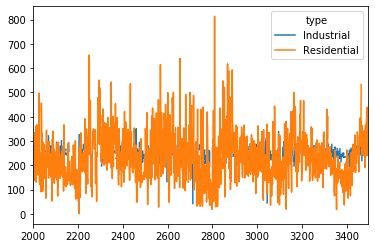

In [30]:
kanpur_data = non_attainment_data.loc[non_attainment_data['location'] == 'Kanpur']
kanpur_data = kanpur_data.groupby(['location','date_processed','Year','type'])['no2','so2','rspm','spm','pm2_5','total_pollution'].mean().reset_index()
kanpur_data = kanpur_data.groupby(['date_processed','Year','type'])['total_pollution'].sum().unstack().reset_index() #.count() 
kanpur_data = kanpur_data.loc[kanpur_data['Year'] > 2010]
kanpur_data[['date_processed','Industrial','Residential']].plot()#(x ='date_processed', y='total_pollution')
# kanpur_data['total_pollution'].plot(figsize=(20,5))

type,Year,location,Industrial,Residential
0,1987,Agra,3668.90,8190.80
1,1987,Delhi,5794.65,3316.15
2,1987,Kota,4555.90,2314.25
3,1987,Ludhiana,2367.00,7517.50
4,1987,Pune,342.00,367.60
...,...,...,...,...
657,2015,Pune,16953.00,49558.50
658,2015,Raipur,8886.00,6990.00
659,2015,Solapur,12750.00,12538.00
660,2015,Surat,3884.00,3570.50


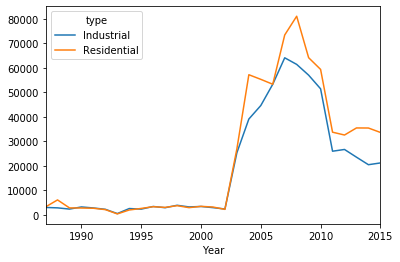

In [31]:
worst30_type = pd.pivot_table(worst30, columns = 'type',values = 'total_pollution',index = ['location','Year']).reset_index()
worst30_type['Total'] = worst30_type['Industrial'].fillna(0) + worst30_type['Residential'].fillna(0) + worst30_type['Sensitive'].fillna(0)
# worst30_type['Industrial'] = worst30_type['Industrial']/worst30_type['Total']
# worst30_type['Residential'] = worst30_type['Residential']/worst30_type['Total']
# worst30_type['Sensitive'] = worst30_type['Sensitive']/worst30_type['Total']
worst30_type.groupby(['Year'])['Industrial','Residential'].median().plot() # Similar plots for mean()

# The plot shows that the contribution by Industries has reduced over the years and residential has shot up
cities = worst30_type['location'].unique().tolist()
cities_type = worst30_type.groupby(['Year','location'])['Industrial','Residential'].median().reset_index()
cities_type

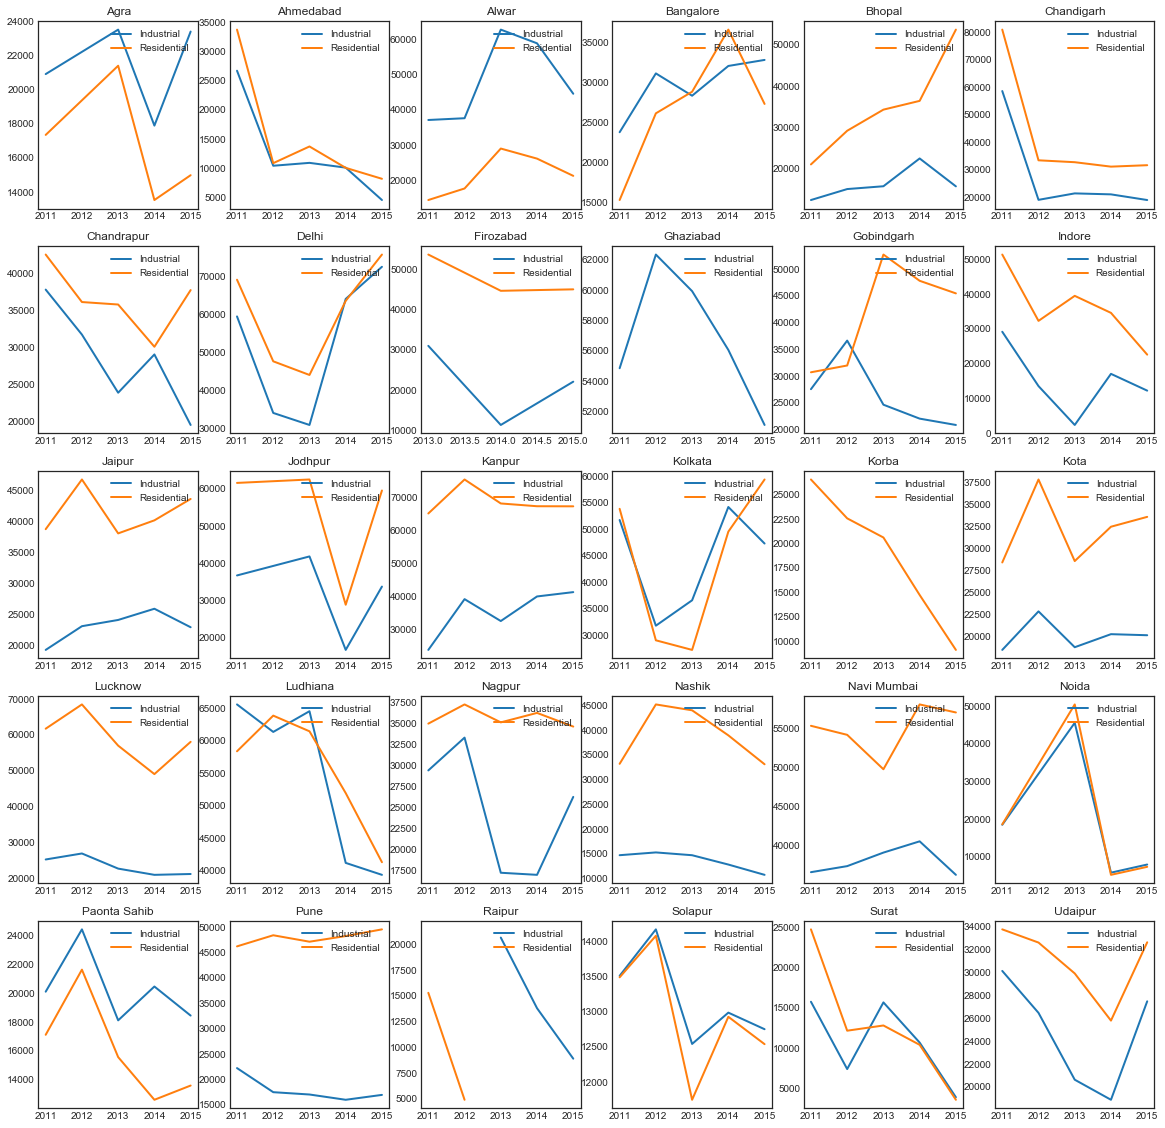

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,20]
plt.style.use('seaborn-white')

cities_type = cities_type.loc[cities_type['Year'] > 2010]

count = 0
for i in cities:
    count += 1
    plt.subplot(5,6,count)
    one_city = cities_type.loc[cities_type['location'] == i]
    industrial = list(one_city['Industrial'])
    residential = list(one_city['Residential'])
    year = list(one_city['Year'])
    plt.plot(year,industrial, label='Industrial', lw=2,)
    plt.plot(year,residential, label='Residential', lw=2)
    plt.title(i)
    plt.legend(loc='upper right')

    

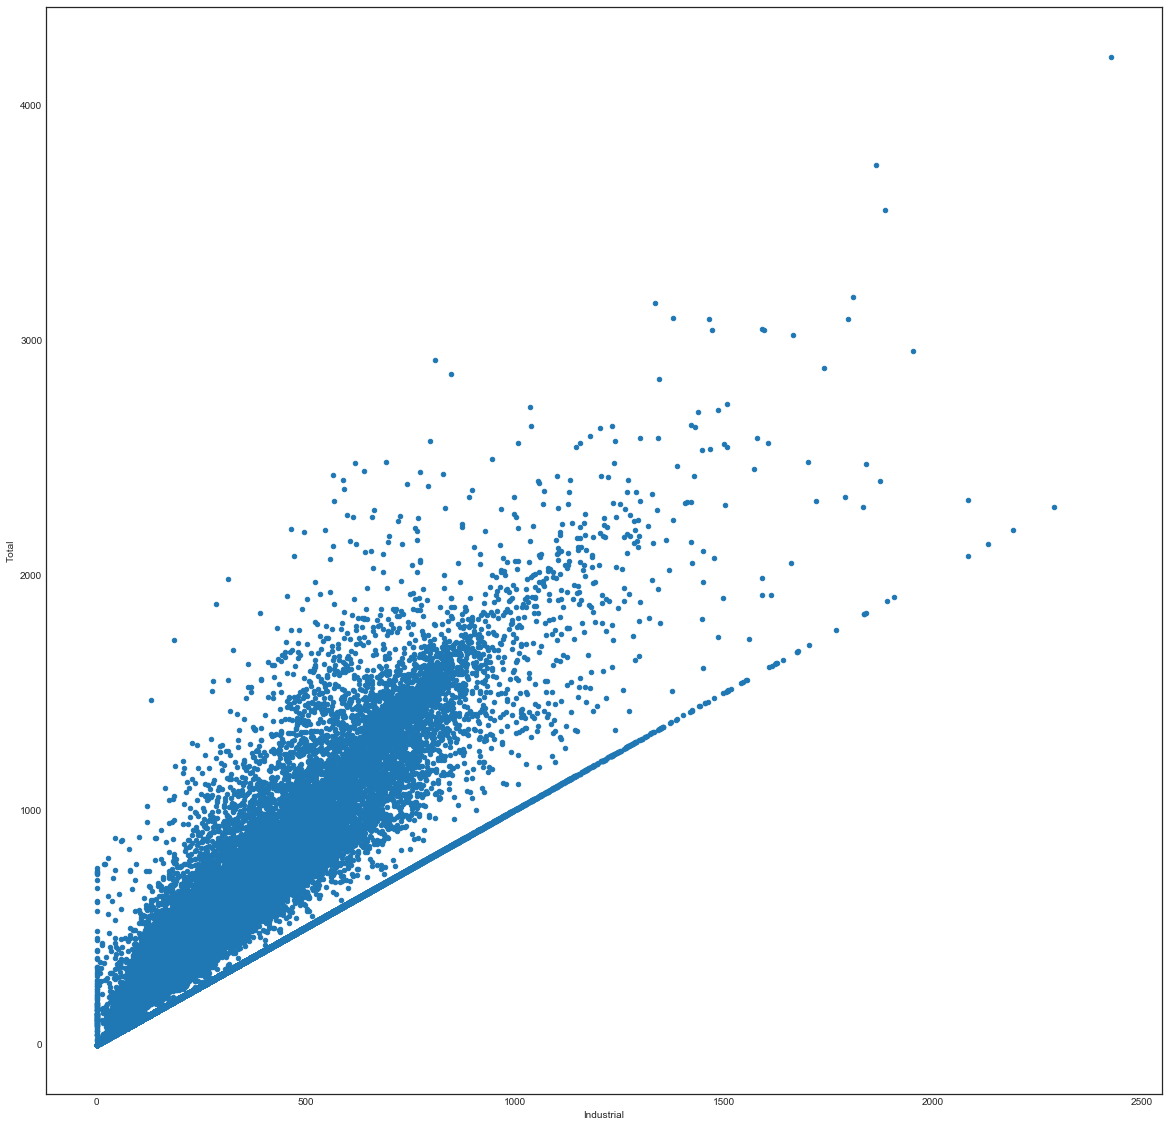

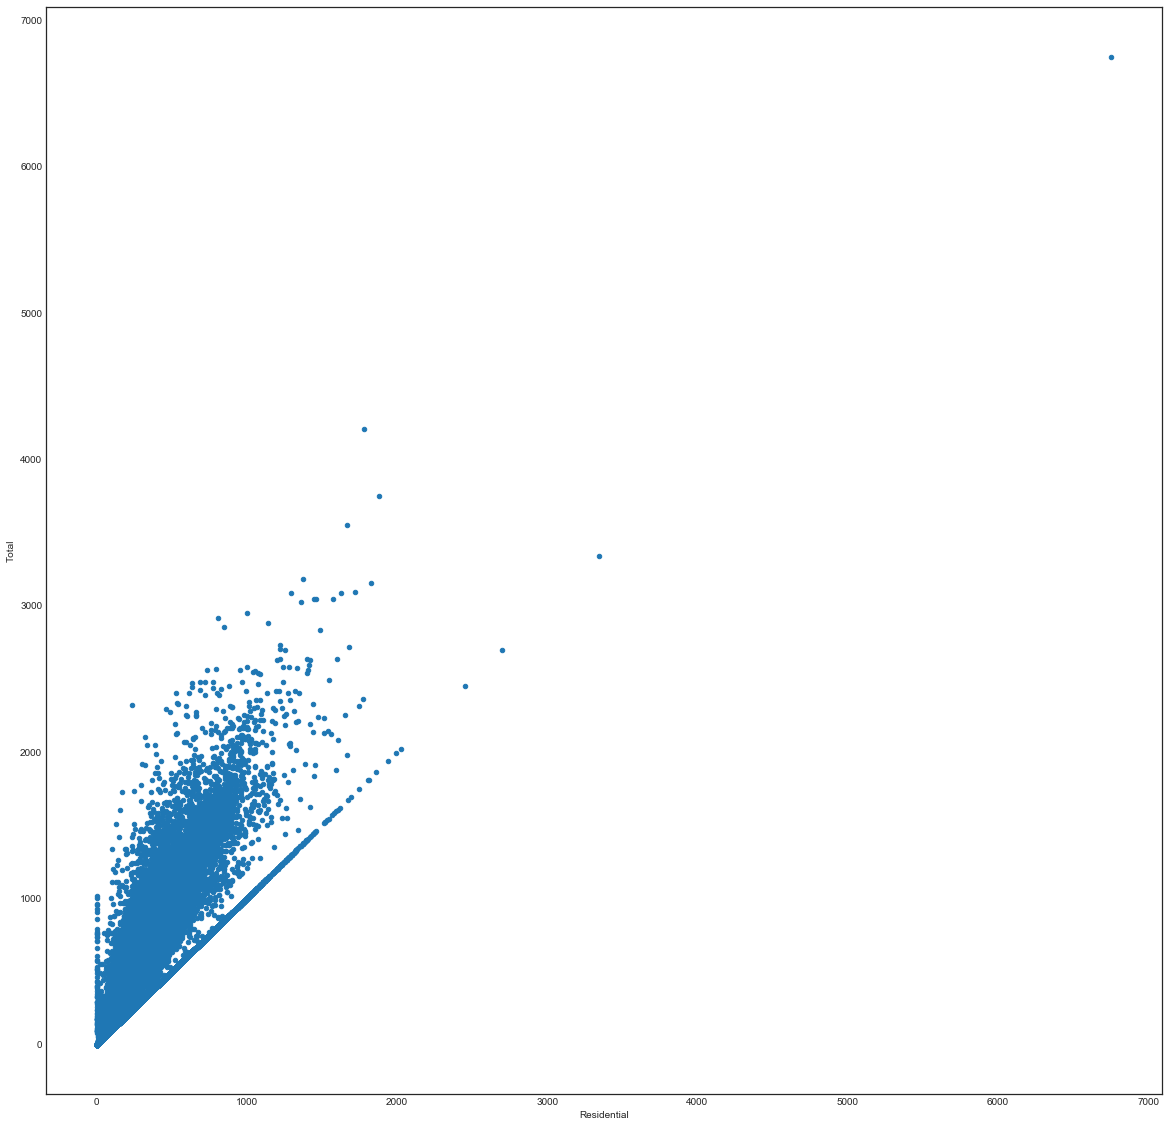

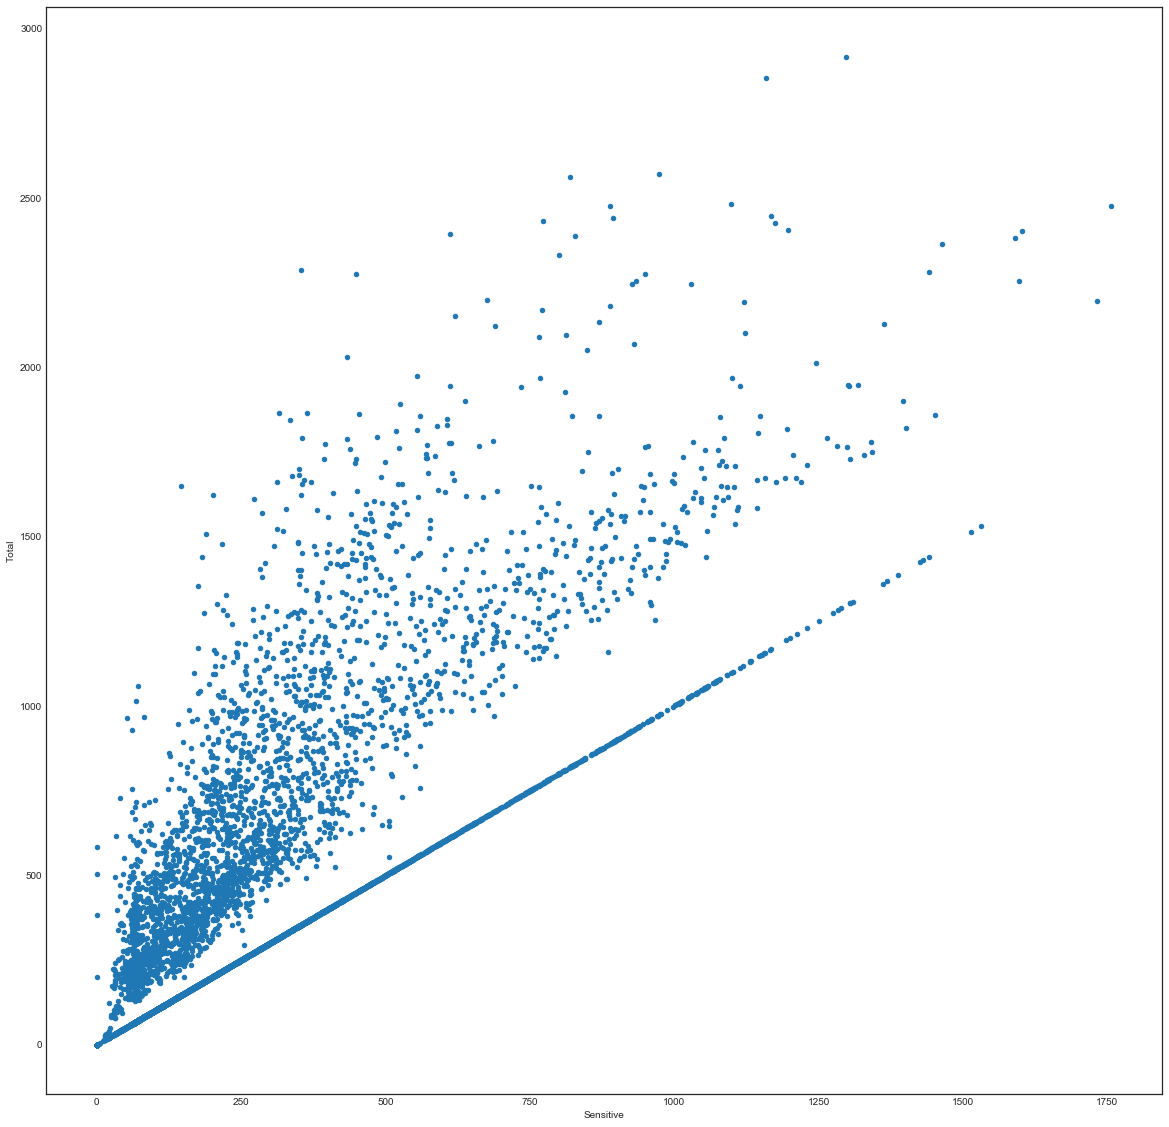

In [44]:
daily_pollution = non_attainment_data.groupby(['location','date_processed','Year','type'])['no2','so2','rspm','spm','pm2_5','total_pollution'].mean().reset_index()
daily_pollution = pd.pivot_table(daily_pollution, values = 'total_pollution', index = ['location','date_processed','Year'], columns = ['type']).reset_index()
daily_pollution['Total'] = daily_pollution['Industrial'].fillna(0) + daily_pollution['Residential'].fillna(0) + daily_pollution['Sensitive'].fillna(0)
daily_pollution.plot(x = 'Industrial', y = 'Total', kind = 'scatter')
daily_pollution.plot(x = 'Residential', y = 'Total', kind = 'scatter')
daily_pollution.plot(x = 'Sensitive', y = 'Total', kind = 'scatter')

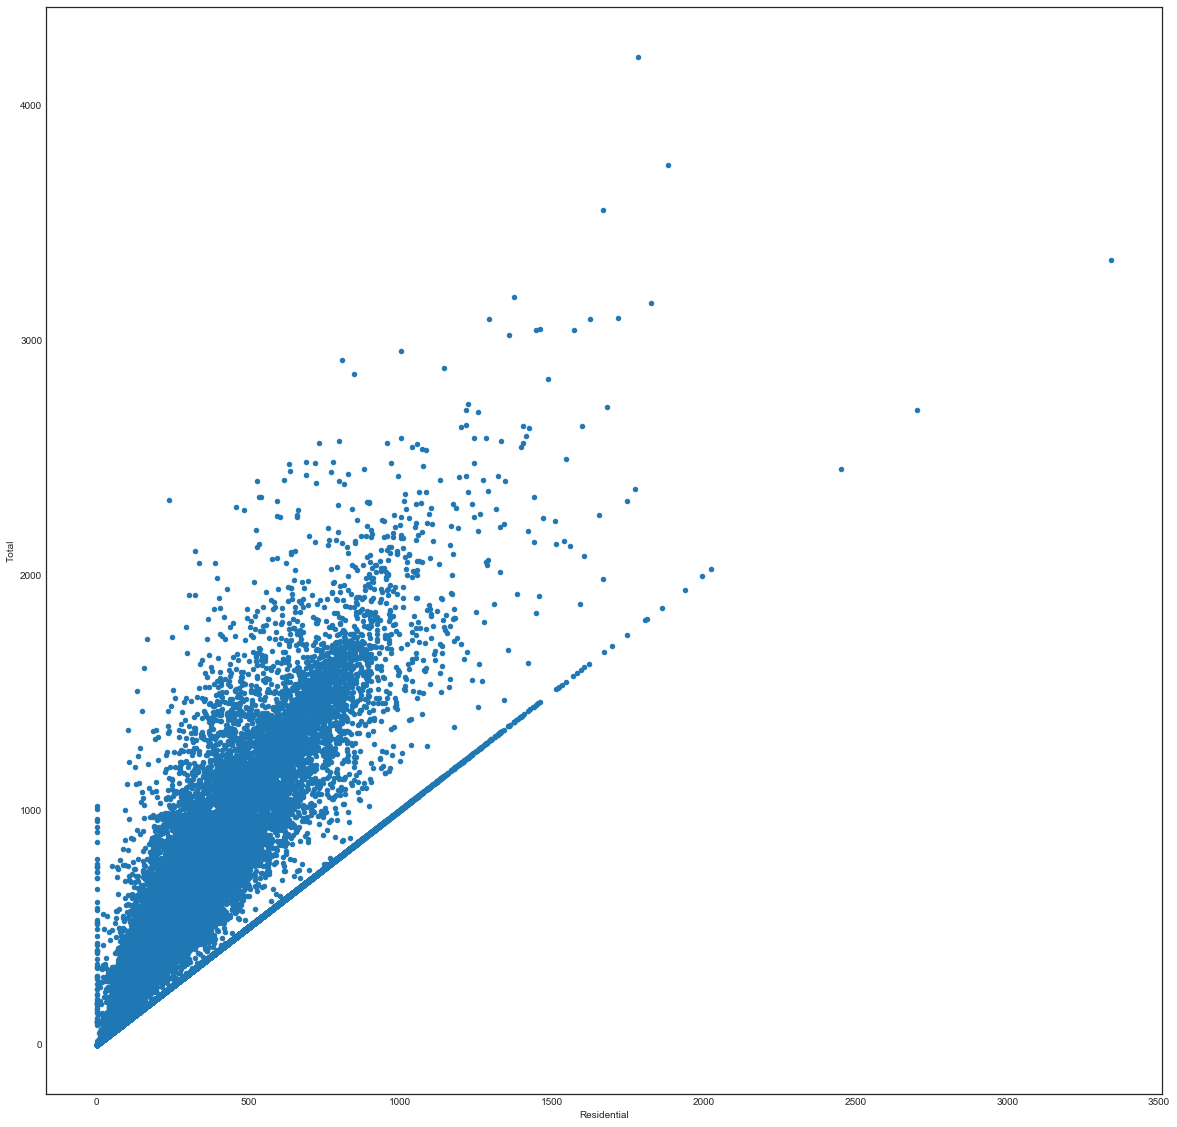

In [49]:
daily_pollution.loc[daily_pollution['Residential'] != max(daily_pollution['Residential'].fillna(0))].plot(x = 'Residential',y = 'Total', kind = 'scatter')